# Data Loading, Cleaning & Preprocessing

In [ ]:
import pandas as pd

#Original Google Drive link
dataset_path = 'https://drive.google.com/file/d/1gUZtIYxHujTZoUi-oMf71nKgU1fkD30g/view?usp=sharing'

#Convert to direct download link
file_id = dataset_path.split('/')[-2]
dataset_path = 'https://drive.google.com/uc?id=' + dataset_path.split('/')[-2]

df = pd.read_csv(dataset_path)


columns_to_drop = ['review_id', 'pseudo_author_id', 'author_name']
df = df.drop(columns=columns_to_drop)
df.head(2)

,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,"At this time it doesn't allow new accounts, on...",1,71,289.0.0.77.109,2023-07-05 22:53:12
1,Incredible!,5,18,NaN,2023-07-05 22:53:18


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize #package that helps split text into individual words
from nltk.stem import WordNetLemmatizer #package that helps to reduce words to their base/ root form
import string #provides a collection of string constants (e.g., punctuation marks)
import string

#Download necessary NLTK data files
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Set the stop words language (e.g., English)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

#Define a function to preprocess text
def preprocess_text(text):
  #Convert to lowercase
  text = text.lower()

  #Remove punctuation
  text = text.translate(str.maketrans('','',string.punctuation))

  #Tokenize text into individual words
  words = word_tokenize(text)

  #Remove stop words & lemmatize
  words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

  #Reconstruct text without stop words
  return ' '.join(words)

df['cleaned_review_text'] = df['review_text'].apply(preprocess_text)

df.head(20)

,review_text,review_rating,review_likes,author_app_version,review_timestamp,cleaned_review_text
0,"At this time it doesn't allow new accounts, on...",1,71,289.0.0.77.109,2023-07-05 22:53:12,time doesnt allow new account instagram signup
1,Incredible!,5,18,NaN,2023-07-05 22:53:18,incredible
2,Not bad,3,15,NaN,2023-07-05 22:56:09,bad
3,First one to rate this app,5,2,NaN,2023-07-05 22:56:23,first one rate app
4,this gotta be one of the apps of all time,5,23,289.0.0.77.109,2023-07-05 22:56:52,got ta one apps time
5,Em primeira mão,5,10,NaN,2023-07-05 22:58:44,em primeira mão
6,"Meia noite eu te conto se o aplicativo é bom, ...",5,23,289.0.0.77.109,2023-07-05 22:59:18,meia noite eu te conto se aplicativo é bom com...
7,"Competition breeds innovation, despite my dist...",4,41,289.0.0.77.109,2023-07-05 22:59:40,competition breed innovation despite distaste ...
8,Sou a primeira pessoa a instalar 🥰,5,2,NaN,2023-07-05 23:00:48,sou primeira pessoa instalar 🥰
9,Primeiro,5,1,289.0.0.77.109,2023-07-05 23:00:51,primeiro


In [ ]:
df['cleaned_review_text'].head(20)

0        time doesnt allow new account instagram signup
1                                            incredible
2                                                   bad
3                                    first one rate app
4                                  got ta one apps time
5                                       em primeira mão
6     meia noite eu te conto se aplicativo é bom com...
7     competition breed innovation despite distaste ...
8                        sou primeira pessoa instalar 🥰
9                                              primeiro
10      im first guy app plz something special id m4hdx
11                                       meow meow meow
12                                              что это
13                                              hopeful
14                                                 имба
15                                     first downloader
16                           op app please grow account
17                                             f

In [ ]:
pip install langdetect  #identify and remove non-English text

In [ ]:
#Implement a language detection function to check how many languages are in this review dataset

import pandas as pd
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Setting seed for reproducibility
DetectorFactory.seed = 0

def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

df['language'] = df['review_text'].apply(detect_language)

language_counts = df['language'].value_counts()

print(language_counts)

language
en         28667
pt          7849
ar          5941
id          4010
so          2844
unknown     2170
ro          1553
af          1406
tl          1259
de          1244
ru          1153
it          1145
ja           871
fa           686
fr           633
ur           598
et           586
ca           568
no           538
pl           532
sw           506
nl           470
es           442
fi           263
cy           253
hr           246
sl           233
sv           231
da           192
cs           187
tr           171
sk           168
hi           162
sq           162
lt           160
vi           136
hu           126
zh-cn         91
bg            71
bn            70
uk            60
ko            51
mk            41
lv            40
mr            31
ml            30
ta            21
ne            13
kn             6
he             5
th             5
te             3
gu             3
zh-tw          2
el             2
Name: count, dtype: int64


In [ ]:
df = df[df['language'] == 'en'] #Only keep english review text
df.head()


,review_text,review_rating,review_likes,author_app_version,review_timestamp,cleaned_review_text,language
0,"At this time it doesn't allow new accounts, on...",1,71,289.0.0.77.109,2023-07-05 22:53:12,time doesnt allow new account instagram signup,en
1,Incredible!,5,18,NaN,2023-07-05 22:53:18,incredible,en
3,First one to rate this app,5,2,NaN,2023-07-05 22:56:23,first one rate app,en
4,this gotta be one of the apps of all time,5,23,289.0.0.77.109,2023-07-05 22:56:52,got ta one apps time,en
7,"Competition breeds innovation, despite my dist...",4,41,289.0.0.77.109,2023-07-05 22:59:40,competition breed innovation despite distaste ...,en


In [ ]:
#Check null
df.isnull().sum()

review_text               0
review_rating             0
review_likes              0
author_app_version     7820
review_timestamp          0
cleaned_review_text       0
language                  0
dtype: int64

In [ ]:
df.dropna(how = 'any', inplace= True)
df.isnull().sum()


review_text            0
review_rating          0
review_likes           0
author_app_version     0
review_timestamp       0
cleaned_review_text    0
language               0
dtype: int64

In [ ]:
#Check duplicates
df.duplicated().sum()

0

In [ ]:
df_sentiment = df[['cleaned_review_text' , 'review_rating']]
df_sentiment.head()

,cleaned_review_text,review_rating
0,time doesnt allow new account instagram signup,1
4,got ta one apps time,5
7,competition breed innovation despite distaste ...,4
15,first downloader,5
18,woah first review,5


In [ ]:
#Create sentiment labels

def map_sentiment(rating):
  if rating in [4,5]:
    return 'positive'
  elif rating == 3:
    return 'neutral'
  else:
    return 'negative'

df_sentiment['sentiment'] = df_sentiment['review_rating'].apply(map_sentiment)
df_sentiment.head()

<ipython-input-13-1b87d5fb0931>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['sentiment'] = df_sentiment['review_rating'].apply(map_sentiment)


,cleaned_review_text,review_rating,sentiment
0,time doesnt allow new account instagram signup,1,negative
4,got ta one apps time,5,positive
7,competition breed innovation despite distaste ...,4,positive
15,first downloader,5,positive
18,woah first review,5,positive


# EDA

<ipython-input-14-43145031f03b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='review_rating', data = df_sentiment, palette='viridis')


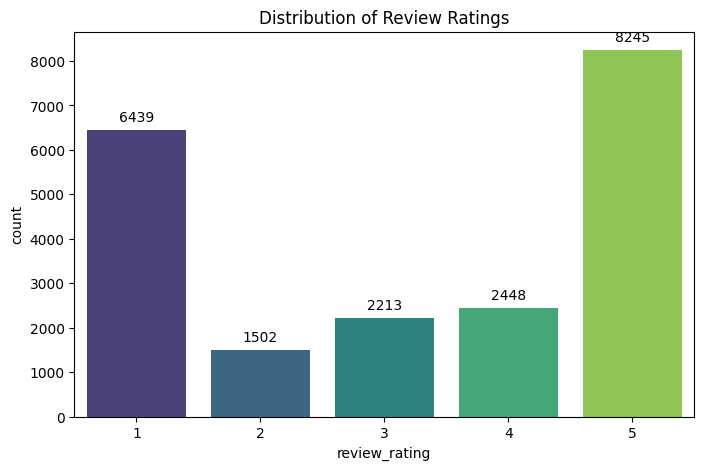

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Distribution of review ratings:
df_sentiment['review_rating'].value_counts()

plt.figure(figsize =(8,5))
ax = sns.countplot(x='review_rating', data = df_sentiment, palette='viridis')
plt.title('Distribution of Review Ratings')

# Adding values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.show()

<ipython-input-15-c19c3a42fc81>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sentiment', data=df_sentiment, palette='viridis')


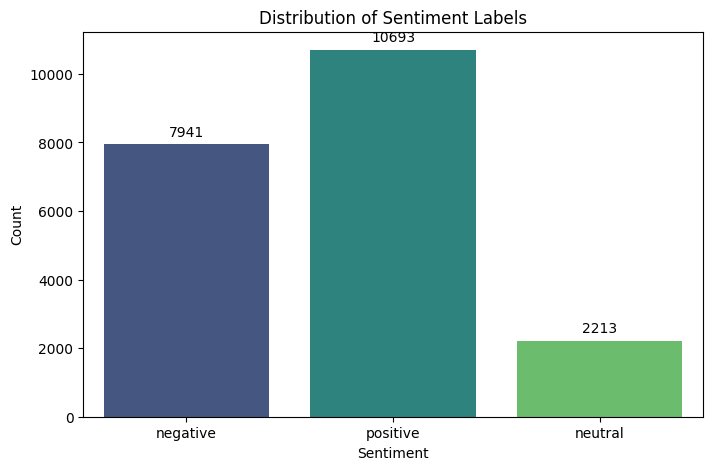

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='sentiment', data=df_sentiment, palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Adding values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

In [ ]:
df_sentiment['sentiment'].value_counts()

sentiment
positive    10693
negative     7941
neutral      2213
Name: count, dtype: int64

Since the amount of neutral reviews are much smaller than the others, it could be seen that our data is having class imbalance problem which may affect the model's result.

Therefore, to mitigate the risk of this imbalance, we will be mindful on the class weighting of our CNN model, which will be introduced in the next part (Sentiment Analysis with CNN)

In [ ]:
#Check review lengths

review_lengths = df_sentiment['cleaned_review_text'].str.len()
print(review_lengths.describe())


count    20847.000000
mean        53.432101
std         56.981785
min          0.000000
25%         16.000000
50%         33.000000
75%         69.000000
max        490.000000
Name: cleaned_review_text, dtype: float64


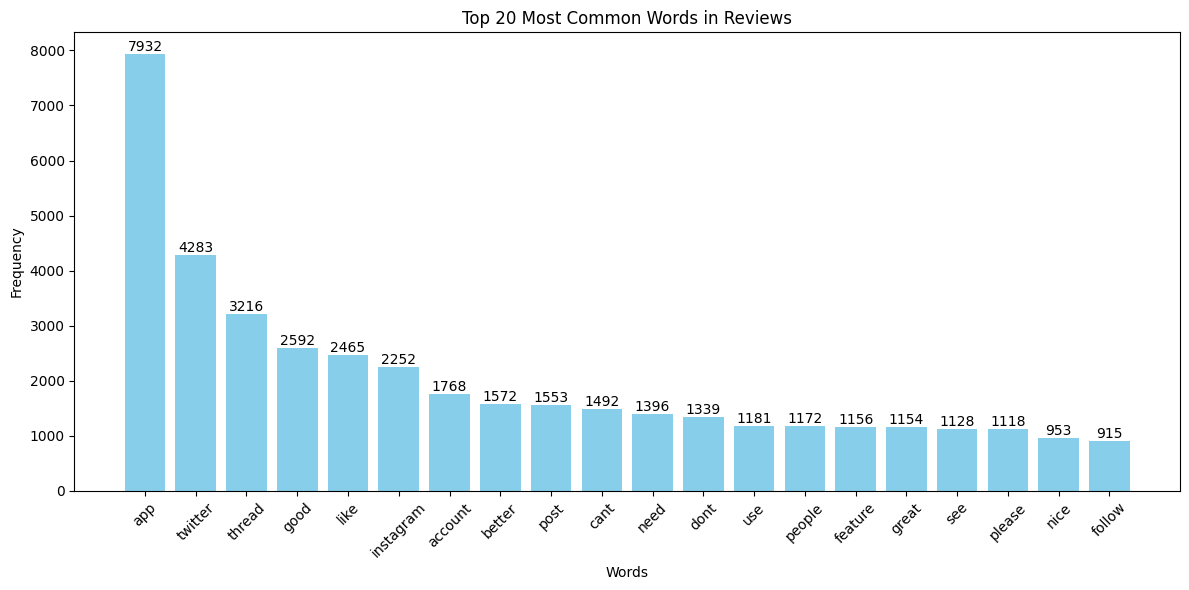

In [ ]:
from collections import Counter

all_words = []
for review in df_sentiment['cleaned_review_text']:
  all_words.extend(review.split())

word_counts = Counter(all_words)

# Explore most frequent words and their counts using word_counts.most_common(100)

most_common_words = word_counts.most_common(20)

# Separate the words and their counts for plotting
words, counts = zip(*most_common_words)

# Create the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in Reviews')
plt.xticks(rotation=45)

# Add the value for each column
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Sentiment Analysis with CNN


In [ ]:
df_sentiment.shape

(20847, 3)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical  # For multi-class classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_recall_curve, f1_score


text = df_sentiment['cleaned_review_text']
labels = df_sentiment['sentiment']

# Define maximum review length
max_len = 490

# Label Encoding
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)  # Encode labels before splitting

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)

# Pad sequences to the same length
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Convert labels to categorical format for multi-class classification
num_classes = 3  # Positive, Negative, Neutral
y_train = to_categorical(labels_encoded, num_classes)  # One-hot encode encoded labels

# Split data into training and testing sets (correct one-time split)
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y_train, test_size=0.2, random_state=42)

# Define class weights
class_weights = {0: 1, 1: 3, 2: 5}  # Weight neutral (2) 5 times more, negative (1) 3 times more

# Create the CNN model
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_len))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))  # Softmax for multi-class classification

#weight array
sample_weights = np.ones(shape=(len(X_train),))
for i, sample in enumerate(X_train):
  if y_train[i][0] == 0:
    sample_weights[i] = 1.0                           #Positive class: No weight change
  elif y_train[i][1] == 1:
    sample_weights[i] = 3.0                           #Weight negative class 3 times more
  else:  # Neutral class
    sample_weights[i] = 5.0                           #Weight neutral class 5 times more

# Compile the model without class_weight argument
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with defined weights
model.fit(X_train, y_train, epochs=10, sample_weight=sample_weights, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)

# Make predictions on test set
y_pred = model.predict(X_test)

# Convert class probabilities into labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

#Calculate F1 metrics
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
print("F1 Score:", f1)

# Calculate precision, recall, and AUC for each class
from sklearn.metrics import precision_score, recall_score

for class_index in range(num_classes):
  # Convert one-hot encoded predictions to class labels
  y_pred_class = np.argmax(y_pred, axis=1)
  y_test_class = np.argmax(y_test, axis=1)

  # Calculate precision and recall for the class
  precision = precision_score(y_test_class == class_index, y_pred_class == class_index)
  recall = recall_score(y_test_class == class_index, y_pred_class == class_index)
  print(f"Class {class_index} (Label: {encoder.inverse_transform([class_index])[0]}):")
  print(f"\tPrecision: {precision:.4f}")
  print(f"\tRecall: {recall:.4f}")

Epoch 1/10
522/522 [==============================] - 62s 116ms/step - loss: 1.2682 - accuracy: 0.5976 - val_loss: 0.8001 - val_accuracy: 0.7046
Epoch 2/10
522/522 [==============================] - 35s 68ms/step - loss: 0.9382 - accuracy: 0.7473 - val_loss: 0.7563 - val_accuracy: 0.7216
Epoch 3/10
522/522 [==============================] - 34s 66ms/step - loss: 0.7728 - accuracy: 0.7912 - val_loss: 0.7427 - val_accuracy: 0.7388
Epoch 4/10
522/522 [==============================] - 37s 70ms/step - loss: 0.6392 - accuracy: 0.8279 - val_loss: 0.8806 - val_accuracy: 0.7079
Epoch 5/10
522/522 [==============================] - 35s 67ms/step - loss: 0.5112 - accuracy: 0.8609 - val_loss: 0.7988 - val_accuracy: 0.7475
Epoch 6/10
522/522 [==============================] - 37s 71ms/step - loss: 0.4139 - accuracy: 0.8916 - val_loss: 0.8964 - val_accuracy: 0.7429
Epoch 7/10
522/522 [==============================] - 36s 70ms/step - loss: 0.3459 - accuracy: 0.9113 - val_loss: 0.9848 - val_accuracy

In [ ]:
#describe models' architecture

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 490, 128)          640000    
                                                                 
 conv1d (Conv1D)             (None, 488, 32)           12320     
                                                                 
 max_pooling1d (MaxPooling1  (None, 244, 32)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 7808)              0         
                                                                 
 dense (Dense)               (None, 3)                 23427     
                                                                 
Total params: 675747 (2.58 MB)
Trainable params: 675747 (2.58 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

# Cross-validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Initialize the StratifiedKFold with the number of splits
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
f1_scores = []

# Convert labels to categorical format for multi-class classification
y_categorical = to_categorical(labels_encoded, num_classes)

for train_index, val_index in kfold.split(padded_sequences, labels_encoded):
    X_train, X_val = padded_sequences[train_index], padded_sequences[val_index]
    y_train, y_val = y_categorical[train_index], y_categorical[val_index]

    # Create a new model instance for each fold
    model = Sequential()
    model.add(Embedding(5000, 128, input_length=max_len))
    model.add(Conv1D(32, 3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # sample weight array
    sample_weights = np.ones(shape=(len(X_train),))
    for i in range(len(X_train)):
        if np.argmax(y_train[i]) == 0:  # Positive class
            sample_weights[i] = 1.0  # No weight change
        elif np.argmax(y_train[i]) == 1:  # Negative class
            sample_weights[i] = 3.0  #Weight negative class 3 times more
        else:  # Neutral class
            sample_weights[i] = 5.0  #Weight neutral class 5 times more

    #Train the model with defined weights
    model.fit(X_train, y_train, epochs=10, sample_weight=sample_weights, validation_data=(X_val, y_val), verbose=0)

    # Evaluate the model on the validation set
    loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
    accuracies.append(accuracy)

    #Make predictions on validation set
    y_pred = model.predict(X_val)

    #Convert class probabilities into labels
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_val_labels = np.argmax(y_val, axis=1)

    #Calculate F1 metrics
    f1 = f1_score(y_val_labels, y_pred_labels, average='weighted')
    f1_scores.append(f1)

print("Cross-validated Accuracy:", np.mean(accuracies))


131/131 [==============================] - 3s 19ms/step
Cross-validated Accuracy: 0.7215908288955688


In [ ]:
print(accuracies)

[0.7182254195213318, 0.7208632826805115, 0.7253537774085999, 0.7255936861038208, 0.7179179787635803]


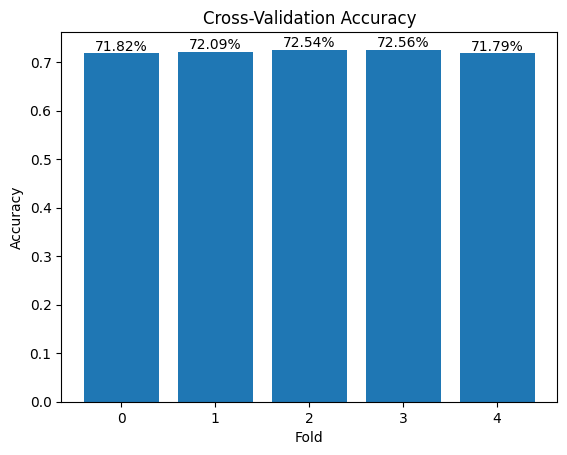

In [ ]:
#Visualize cross-validated accuracies with bar chart
import matplotlib.pyplot as plt

# Create a bar chart
plt.bar(range(len(accuracies)), accuracies)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy')

#Display percentage on each bar
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy, f'{accuracy * 100:.2f}%', ha='center', va='bottom')
plt.show()



# Topic modelling with LDA

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

text = df_sentiment['cleaned_review_text']
labels = df_sentiment['sentiment']

# Filter positive and negative reviews
positive_reviews = text[labels == 'positive']
negative_reviews = text[labels == 'negative']

In [ ]:
positive_reviews.head(100)

4                                   got ta one apps time
7      competition breed innovation despite distaste ...
15                                      first downloader
18                                     woah first review
26               way better twitter thank big daddy zuck
                             ...                        
443                                      elon musk chora
451                                   tá igual twitter 😂
452          parece promissor um sucessor twitter talvez
457                    wow great thread welcome india 👏🤗
460                                            perfect 👏
Name: cleaned_review_text, Length: 100, dtype: object

In [ ]:
negative_reviews.head(100)

0          time doesnt allow new account instagram signup
30                                                  first
112     home feed full verified people dont follow car...
138                                             worst app
173     display still glitch android cant even see con...
                              ...                        
1883       think elon win fight app fine though good uiux
1889    run oligarch want shut far cry twitter free sp...
1968                     chatdm button please add feature
1975    app doesnt work screen flash error phone redmi...
1984                                         time waste😡😡
Name: cleaned_review_text, Length: 100, dtype: object

In [ ]:
# Define number of topics for each category
num_topics_positive = 10
num_topics_negative = 10

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=2000)

# Create TF-IDF features for positive and negative reviews
positive_features = vectorizer.fit_transform(positive_reviews)
negative_features = vectorizer.transform(negative_reviews)

# Topic Modeling with Latent Dirichlet Allocation (LDA)
# Model for positive reviews
lda_model_positive = LatentDirichletAllocation(n_components=num_topics_positive, random_state=42)
lda_model_positive.fit(positive_features)

# Model for negative reviews
lda_model_negative = LatentDirichletAllocation(n_components=num_topics_negative, random_state=42)
lda_model_negative.fit(negative_features)

# Function to display topics (modify based on your preference)
def display_topics(model, vectorizer, n_top_words=10):
  for topic_idx, topic in enumerate(model.components_):
    print("Topic %d:" % (topic_idx + 1))
    features_names = vectorizer.get_feature_names_out()
    top_words = [features_names[i] for i in topic.argsort()[-n_top_words:]]
    print(" ".join(top_words))
    print("-----")

# Display topics for positive reviews
print("Topics from Positive Reviews:")
display_topics(lda_model_positive, vectorizer)

# Display topics for negative reviews
print("Topics from Negative Reviews:")
display_topics(lda_model_negative, vectorizer)


Topics from Positive Reviews:
Topic 1:
lovely interface fun beat twitter good wonderful app one amazing
-----
Topic 2:
think app way alternative thread much review first better twitter
-----
Topic 3:
follow like option please feature easy use add need thread
-----
Topic 4:
im friendly like instagram good thread user wow app top
-----
Topic 5:
instagram smooth like thread really experience best nice app good
-----
Topic 6:
happy give follower blue bird thanks zuck loving app great
-----
Topic 7:
platform thank super nice best medium twitter good social application
-----
Topic 8:
really account feature useful twitter like loved new app awesome
-----
Topic 9:
good mode thread musk elon interesting apps app perfect love
-----
Topic 10:
clean well bye good zuckerberg app twitter pretty mark cool
-----
Topics from Negative Reviews:
Topic 1:
racist opinion time truth waste support free boring speech freedom
-----
Topic 2:
better new clone work app doesnt twitter nothing properly working
-----

Note: In this code file, we extracted top 10 most common topics from the positive and negative reviews, but in the report, we only analyzed the top 5 ones due to limitations in report pages. We still keep the number of topic modeling on this code as 10 to ensure consistency of topics we already wrote in the report.